In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
m = 200 #number of training examples
n_x = 2 #number of input features

X = np.zeros((n_x, m))
Y = np.zeros((1, m))

In [51]:
# to hide a code section use

points_per_label = m // 2

r = np.linspace(0, 1, points_per_label)
t = np.linspace(0, 4, points_per_label) + np.random.randn(points_per_label) * 0.2

X[:, :points_per_label] = np.vstack((r * np.sin(t * 2.5), r * np.cos(t * 2.5)))
Y[:, :points_per_label] = 0

r = np.linspace(0, 1, points_per_label)
t = np.linspace(4, 8, points_per_label) + np.random.randn(points_per_label) * 0.2

X[:, points_per_label:] = np.vstack((r * np.sin(t * 2.5), r * np.cos(t * 2.5)))
Y[:, points_per_label:] = 1

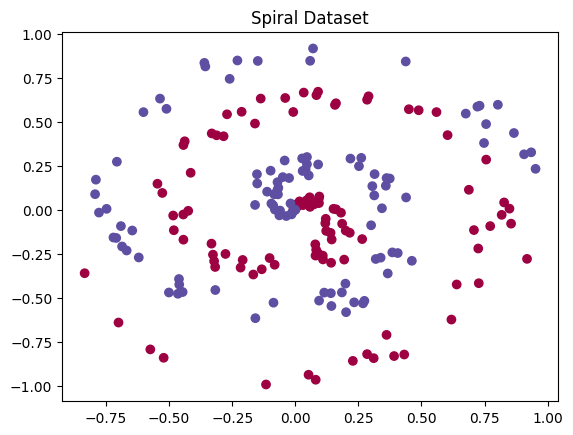

In [52]:
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral)
plt.title("Spiral Dataset")
plt.show()


In [53]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)*0.01 # these are 4 weights, each of which multiples the 4 activations of each neuron in the hidden layer
    b2 = np.zeros((n_y, 1))
    params = {'w1': w1,'b1': b1,'w2': w2,'b2': b2,}

    return params

In [54]:
#parameters = initialize_parameters(X.shape[0], 4, Y.shape[0])
#parameters

In [55]:
def forward_pass(X, params):
    w1 = params['w1']
    b1 = params['b1']
    w2 = params['w2']
    b2 = params['b2']

    z1 = np.dot(w1, X) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1/(1+np.exp(-z2))

    cache = {'z1': z1, 'a1':a1, 'z2': z2, 'a2':a2}

    return a2, cache

In [56]:
#a2, cache = forward_pass(X, parameters)

In [57]:
def cost(a2, Y):
    epsilon = 1e-15
    m = Y.shape[1]
    J = - (1/m) * np.sum(Y * np.log(a2 + epsilon) + (1 - Y) * np.log(1 - a2+epsilon))

    return J

In [58]:
def backward_pass(X, Y, params, cache):
    m = Y.shape[1]
    w2 = params['w2']

    z1 = cache['z1']
    a1 = cache['a1']
    z2 = cache['z2']
    a2 = cache['a2']

    dz2 = a2 - Y
    da1 = np.dot(w2.T, dz2)
    dz1 = (1-a1**2) * da1
    dw2 = np.dot(dz2, a1.T)/m
    db2 = np.sum(dz2, axis=1 , keepdims=True)/m
    dw1 = np.dot(dz1, X.T)/m
    db1 = np.sum(dz1, axis=1, keepdims=True)/m

    grads = {'dw1': dw1, 'db1': db1, 'dw2': dw2, 'db2': db2}

    return grads

In [59]:
def update_parameters(params, grads, learning_rate):
    w1 = params['w1'] - learning_rate * grads['dw1']
    w2 = params['w2'] - learning_rate * grads['dw2']
    b1 = params['b1'] - learning_rate * grads['db1']
    b2 = params['b2'] - learning_rate * grads['db2']

    updated_params = {'w1': w1, 'w2': w2, 'b1': b1, 'b2': b2}

    return updated_params

In [60]:
parameters = initialize_parameters(X.shape[0], 20, Y.shape[0])

In [61]:
learning_rate = 1

In [65]:
for i in range(100000):
    a2, cache = forward_pass(X, parameters)
    gradients = backward_pass(X, Y, parameters, cache)
    parameters = update_parameters(parameters, gradients, learning_rate)

    if i % 10000 == 0:
        print(f"Iteration {i}: cost = {cost(a2, Y)}")


Iteration 0: cost = 0.015967701061673306
Iteration 10000: cost = 0.015829122360748356
Iteration 20000: cost = 0.015711829947057995
Iteration 30000: cost = 0.015609149851387527
Iteration 40000: cost = 0.015516796021077268
Iteration 50000: cost = 0.01543329933397729
Iteration 60000: cost = 0.015358904337185692
Iteration 70000: cost = 0.015292388109059314
Iteration 80000: cost = 0.015231372265531895
Iteration 90000: cost = 0.015173393890676502


In [74]:
idx = np.random.randint(0, X.shape[1])
x_test = X[:, idx].reshape(2, 1)
label = Y[:, idx][0]

a2, _ = forward_pass(x_test, parameters)
prediction = 1 if a2 > 0.5 else 0

print(f"Input index: {idx}, True label: {label}, Prediction: {prediction}, Probability: {a2[0,0]:.4f}")


Input index: 131, True label: 1.0, Prediction: 1, Probability: 0.9963
